In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import data
import channels
import artists

In [4]:
x = [lambda distances: distances, 
     lambda distances: np.cos(distances*(np.pi-np.pi/2) + np.pi/2)+2,
     lambda distances: np.cos(distances*(np.pi/2-np.pi)+np.pi/2)+2,
     lambda distances: distances + edge]

In [5]:
y = [lambda distance: 0 * distances, 
     lambda distances: np.sin(distances*(np.pi-np.pi/2) + np.pi/2),
     lambda distances: np.sin(distances*(np.pi/2-np.pi)+np.pi/2),
     lambda distances: 0 * distances
     ]

In [6]:
color = [lambda distances : "red",
         lambda distances : "green",
         lambda distances : "orange",
         lambda distances : "blue"
]

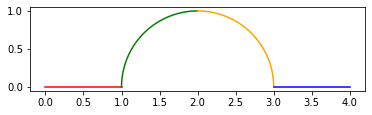

In [7]:
fig, ax = plt.subplots()
distances = np.linspace(0,1,1000)
for edge in range(4):
    ax.plot(x[edge](distances), y[edge](distances), color=color[edge](distances))
ax.set_aspect('equal')

In [8]:
#implict edge id is the index/loc in the array
vertex_table = [(0,1), (1,2), (2,3), (3,4)]
edge_table = {'x':x, 'y':y, 'color':color}

In [10]:
np.random.random()

0.9955755286310061

In [9]:
table = data.EdgeSimplex(num_verts=9)

In [9]:
# data subsamples, 
# tau converts to axis coordinates
transforms = {'x': ('x', channels.Position()),
              'y': ('y', channels.Position()),
              'facecolor': ('color', channels.IdentityColor())}

In [10]:
table.FB.F['color'].categories

['red', 'green', 'orange', 'blue']

In [11]:
transforms['facecolor'][1].validate(table.FB.F['color'])

True

In [12]:
transforms['facecolor'][1].convert(table.view('edge')['color'])

[(1.0, 0.0, 0.0, 1.0),
 (1.0, 0.6470588235294118, 0.0, 1.0),
 (0.0, 0.5019607843137255, 0.0, 1.0),
 (0.0, 0.0, 1.0, 1.0),
 (1.0, 0.0, 0.0, 1.0),
 (1.0, 0.6470588235294118, 0.0, 1.0),
 (0.0, 0.5019607843137255, 0.0, 1.0),
 (0.0, 0.0, 1.0, 1.0),
 (1.0, 0.0, 0.0, 1.0)]

In [13]:
table.view("edge").keys()

dict_keys(['index', 'x', 'y', 'color'])

[(-1.0, 1.0), (-1.0, 1.0), Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), None]

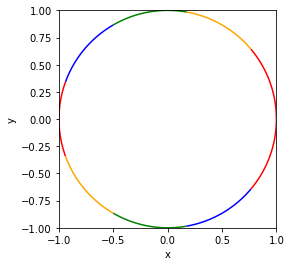

In [14]:
fig, ax = plt.subplots()

artist = artists.Line(table, transforms)
ax.add_artist(artist)
ax.set(xlim = (table.FB.F[transforms['x'][0]].min, 
               table.FB.F[transforms['x'][0]].max), 
       ylim = (table.FB.F[transforms['y'][0]].min, 
               table.FB.F[transforms['y'][0]].max),       
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')


In [15]:
transforms_0d = {'y': ('x', channels.Position()),       
                 'x': ('y', channels.Position()),
                 'facecolors': ('color', channels.IdentityColor())} 

[(-1.0, 1.0), (-1.0, 1.0), Text(0.5, 0, 'y'), Text(0, 0.5, 'x'), None]

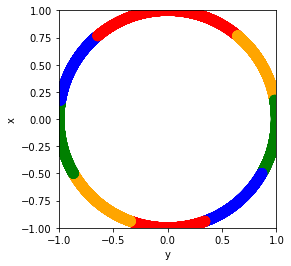

In [16]:
fig, ax = plt.subplots()

artist = artists.Point(table, transforms_0d)
ax.add_artist(artist)
ax.set(xlim = (table.FB.F[transforms_0d['x'][0]].min, 
               table.FB.F[transforms_0d['x'][0]].max), 
       ylim = (table.FB.F[transforms_0d['y'][0]].min, 
               table.FB.F[transforms_0d['y'][0]].max),       
       xlabel = transforms_0d['x'][0], 
       ylabel = transforms_0d['y'][0], 
       aspect='equal')


In [17]:
ind = [(i, d) for d in table.distances for i in table.keys]

In [97]:
table.view("vertex").keys()

dict_keys(['index', 'x', 'y', 'color'])

In [11]:
from collections import defaultdict

In [47]:
  adj_mat = np.zeros((len(vertex_table), len(vertex_table)))

In [48]:
adj_mat

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [49]:
for (start, end) in vertex_table:
    # start col is 0-4, end col is 0-1 
    adj_mat[start, end-1]+=1

In [50]:
adj_mat

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [55]:
(adj_mat == np.diag(np.diagonal(adj_mat))).all()

True

In [57]:
lambda 

SyntaxError: invalid syntax (<ipython-input-57-f90d1c5160f1>, line 1)

In [63]:
sorted(zip([2,3,4,1], vertex_table), key=lambda sc:sc[1][0])

[(2, (0, 1)), (3, (1, 2)), (4, (2, 3)), (1, (3, 4))]

In [67]:
adj_mat.sum(axis=0) == adj_mat.sum(axis=1)

array([ True,  True,  True,  True])

In [68]:
np.ones(4)

array([1., 1., 1., 1.])

In [70]:
data.is_continuous(adj_mat)

AttributeError: module 'data' has no attribute 'is_continuous'